In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error,make_scorer
import xgboost as xgb

# Read Data

In [2]:
# TODO: read data.csv into a dataframe (~1 line)
df = pd.read_csv('data.csv')
## END OF TODO

df.head()

,id,Jitter (local),Jitter (local/absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local/dB),Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,Class
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [3]:
df.shape
# Expected output: (1040,29)

(1040, 29)

In [4]:
del df['id'] # remove subject ID column

In [5]:
df.describe()

,Jitter (local),Jitter (local/absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local/dB),Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,Class
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,12.215345,...,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,6.016261,...,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,0.517000,...,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,8.079500,...,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,11.418659,...,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,15.306125,...,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,44.764000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


# Split Data into Training and Testing

In [6]:
# TODO: extract features and labels (~3 lines)
# Use the last column as label Y. 
# The next to the last column UPDRS (Unified Parkinson's Disease Rating Scale)
# can be used in the bonus (optional) problem for regression. 
# Use the rest columns (other than the last two columns) as features X
X= df.iloc[:,:-2].astype(float)
Y= df.iloc[:,-1]
# END OF TODO 

In [7]:
# TODO: hold out 20% for testing using stratified sampling (~1 line)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# END OF TODO 

In [8]:
nfolds = 10

In [9]:
X.shape # Expected outcome: (1040,26)

(1040, 26)

In [10]:
Y.shape # Expected outcome: (1040,0)

(1040,)

## K-Nearest Neighbors (KNN)

In [11]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

# TODO: set parameter k as odd numbers from 1 to 13 (~1 line)
param_range=np.arange(14)[1::2]
# END OF TODO 

param_grid = [{'knn__n_neighbors': param_range}]

# TODO: Using GridSearchCV to find the optimal k. setup n_jobs=-1 to use all CPUs (~1 line)
gs_knn = GridSearchCV(pipe_knn,param_grid,n_jobs=-1,cv=5)
# TODO: Fit the KNN grid search model to training data (~1 line)
gs_knn.fit(X_train,Y_train)
# END OF TODO

print(gs_knn.best_score_)
print(gs_knn.best_params_)

0.6670673076923077
{'knn__n_neighbors': 7}


In [14]:
clf_knn = gs_knn.best_estimator_
clf_knn.fit(X_train, Y_train)
print('Test accuracy: %.3f' % clf_knn.score(X_test, Y_test))

Test accuracy: 0.668


## Support Vector Machines (SVM)

In [18]:
# TODO: Build a pipeline including a standard scaler and SVC classifier (~1 line)
pipe_svm = Pipeline([('scl', StandardScaler()),('svm', svm.SVC())])
# END OF TODO

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svm__C': param_range,'svm__gamma': param_range,'svm__kernel':('linear', 'rbf')}]

# TODO: Use GridSearchCV to find optimal kernel (linear or rbf), C (param_range), and/or gamma (param_range) (~3 lines)
gs_svm = GridSearchCV(pipe_svm,param_grid,n_jobs=-1,cv=5)

gs_svm.fit(X_train,Y_train)


# END OF TODO

print(gs_svm.best_score_)
print(gs_svm.best_params_)

0.6959134615384616
{'svm__C': 10.0, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [19]:
clf_svm = gs_svm.best_estimator_
clf_svm.fit(X_train, Y_train)
print('Test accuracy: %.3f' % clf_svm.score(X_test, Y_test))

Test accuracy: 0.721


## Naive Bayes (NB)

In [41]:
# TODO: Build a Naive Bayes classifier (no hyper-parameters) (~2 lines)
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

# END OF TODO

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
print(clf_nb.score(X_test,Y_test))

0.5721153846153846


## Neural Networks (NN)

In [31]:
# TODO: Use MLPClassifier to build a neural network.(~2 lines)
# Try different hyper-parameters of # of layers and # of nodes in each layer
pipe_mlp = Pipeline([('scl', StandardScaler()),('mlp', MLPClassifier())])

param_grid = [
        {
            'activation' : [ 'relu'],
            'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes': [(30,30,30),(50,50,50),(100,100,100)],
            'max_iter':[500]
        }
       ]
gs_mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5)
gs_mlp.fit(X_train,Y_train)

# END OF TODO
print(gs_mlp.best_score_)
print(gs_mlp.best_params_)
clf_nn = gs_mlp.best_estimator_
clf_nn.fit(X_train, Y_train)

0.6310096153846154
{'activation': 'relu', 'hidden_layer_sizes': (30, 30, 30), 'max_iter': 500, 'solver': 'adam'}


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
print(clf_nn.score(X_test,Y_test))

0.5673076923076923


## Decision Tree

In [33]:
## TODO: Use tree.DecisionTreeClassifier to build a decision tree using training data (~2 lines)
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
## END OF TODO
print(clf_dt.score(X_test,Y_test))

0.6394230769230769


## Visualize the tree

In [34]:
import graphviz as gv
dot_data = tree.export_graphviz(clf_dt, out_file=None) 
graph = gv.Source(dot_data) 
graph.render("Parkinson Decision Tree")
feature_names = list(df.iloc[:, 0:-2].head())

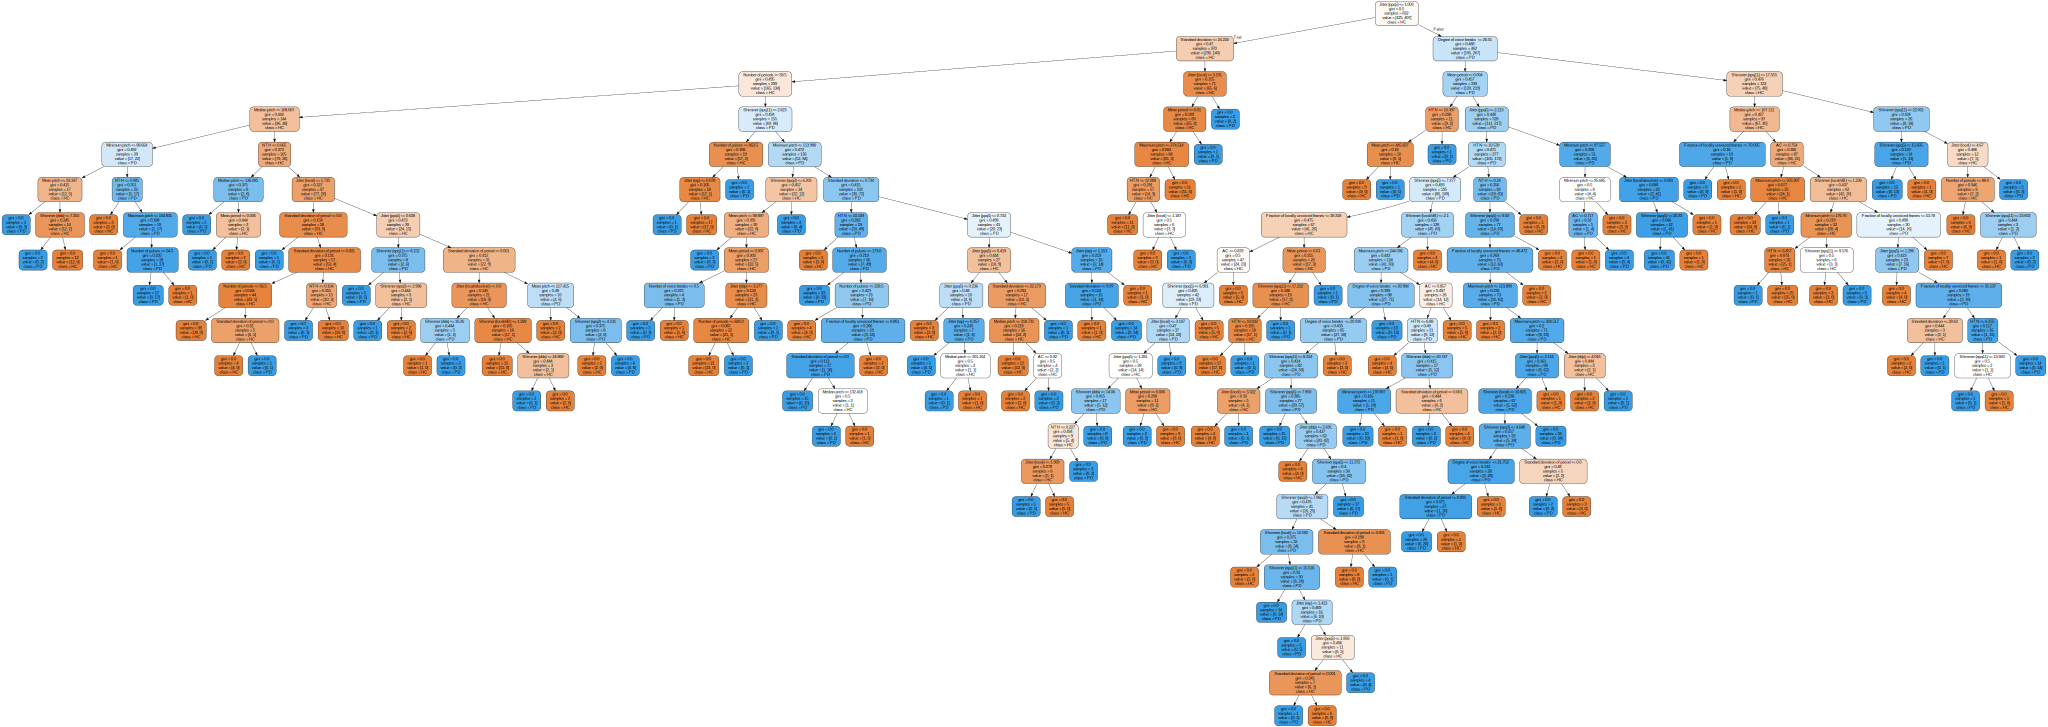

In [35]:
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                                feature_names=feature_names,
                                class_names=['HC','PD'],
                                filled=True,
                                rounded=True)  
graph = gv.Source(dot_data)
graph

# Learning Curve

In [37]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

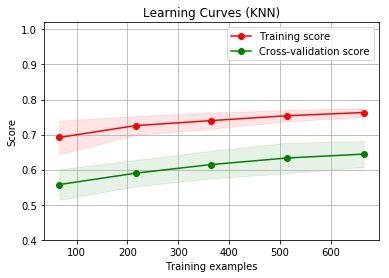

In [38]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator = gs_knn.best_estimator_
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.4, 1.02), cv=cv, n_jobs=-1)
plt.show()

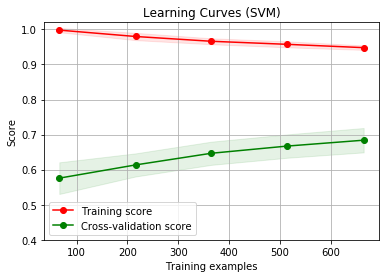

In [39]:
## TODO: Plot the learning and cross-validaiton curves for SVM (~4 lines)
title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator = gs_svm.best_estimator_
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.4, 1.02), cv=cv, n_jobs=-1)
plt.show()
# END OF TODO

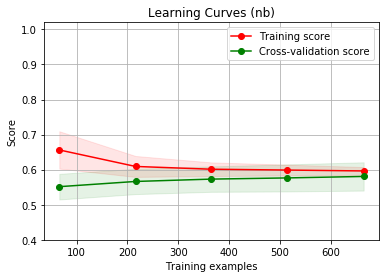

In [43]:
## TODO: Plot the learning and cross-validaiton curves for Naive Bayes (~4 lines)
title = "Learning Curves (nb)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator = clf_nb
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.4, 1.02), cv=cv, n_jobs=-1)
plt.show()

# END OF TODO

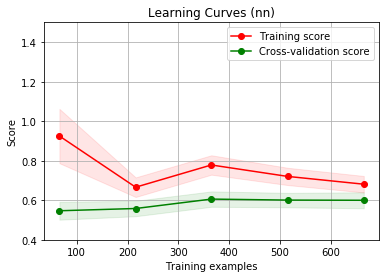

In [45]:
## TODO: Plot the learning and cross-validaiton curves for Neural Networks (~4 lines)

title = "Learning Curves (nn)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator = clf_nn
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.4, 1.5), cv=cv, n_jobs=-1)
plt.show()


# END OF TODO

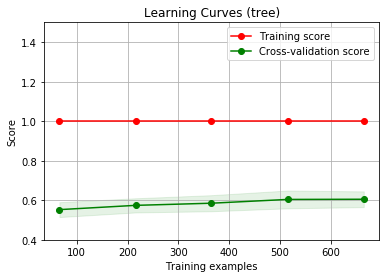

In [46]:
## TODO: Plot the learning and cross-validaiton curves for Decision Tree (~4 lines)
title = "Learning Curves (tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
estimator = clf_dt
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.4, 1.5), cv=cv, n_jobs=-1)
plt.show()



# END OF TODO

# BONUS (OPTIONAL): Regression

In [55]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

In [47]:
# TODO: Use XGBoost Regression or Support Vector Regression to train a regression model to predict UPDRS (bonus: 5 points)
X= df.iloc[:,:-2].astype(float)
Y= df.iloc[:,-2].astype(float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, Y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(Y_test, y_pred)
print(np.sqrt(mse))
print(xgb_model.score(X_test,Y_test))

16.15493859563334
0.10658620601830383


In [65]:
np.shape(Y_pred)

(208,)